<a href="https://colab.research.google.com/github/farhanzibran/Data-Wrangling/blob/main/proyek_analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data**

## **Menyiapkan semua library yang dibutuhkan**

In [ ]:
#mengimport library python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [ ]:
#membaca data
customers_df = pd.read_csv("https://raw.githubusercontent.com/farhanzibran/Data-Wrangling/refs/heads/main/customers.csv")

#menampilkan data dengan 5 teratas
customers_df.head()



,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/farhanzibran/Data-Wrangling/refs/heads/main/orders.csv")
orders_df.head()



,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [ ]:
products_df = pd.read_csv("https://raw.githubusercontent.com/farhanzibran/Data-Wrangling/refs/heads/main/products.csv")
products_df.head()



,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [ ]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/farhanzibran/Data-Wrangling/refs/heads/main/sales.csv")
sales_df.head()



,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


### **Assesing Data**

### Menilai tabel customer

In [ ]:
#memeriksa type data dan memeriksa jumlah data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [ ]:
#memeriksa data yang missing value
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [ ]:
#memeriksa dan mencetak missing data pada kolom gender
print("Jumlah missing value pada gender: ", customers_df.gender.isna().sum())

Jumlah missing value pada gender:  18


In [ ]:
#memeriksa dan mencetak jumlah duplikasi data
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  6


In [ ]:
#menampilkan ringkasan parameter statistik(mean,median,dll) dan bisa untuk melihat apakah datanya sudah akurat atau belum
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


### Menilai tabel orders

In [ ]:
#assesing & cleaning data orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
orders_df.nunique()

,0
order_id,1000
customer_id,617
payment,995
order_date,291
delivery_date,305


In [ ]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


### Menilai tabel products

In [ ]:
#memeriksa type data dan memeriksa jumlah data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


In [ ]:
print("Jumlah Duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah Duplikasi:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


### Menilai tabel sales

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [ ]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


In [ ]:
print("Jumlah missing value pada kolom total_price: ", sales_df.total_price.isna().sum())

Jumlah missing value pada kolom total_price:  19


In [ ]:
print("Jumlah Duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

Jumlah Duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


### **Cleaning Data**

### membersihkan tabel customer

**Duplicate** **Date**

In [ ]:
#memeriksa jumlah duplikasi data
customers_df.duplicated().sum()


6

In [ ]:
#menghilangkan duplicate data
customers_df.drop_duplicates(inplace=True)

In [ ]:
#memeriksa dan mencetak jumlah duplikasi data
print("Jumlah Duplikasi New: ", customers_df.duplicated().sum())


Jumlah Duplikasi New:  0


**Missing Values**

In [ ]:
#memeriksa missing values
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [ ]:
#memeriksa dan mencetak missing data pada kolom gender
print("Jumlah missing value pada gender: ", customers_df.gender.isna().sum())

Jumlah missing value pada gender:  18


In [ ]:
#menampilkan baris yang memiliki missing value
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [ ]:
#karena missing value ingin diisi dengan nilai dominan,maka diperiksa dahulu kategori yang dominannnya.
customers_df.gender.value_counts()

,count
gender,
Prefer not to say,725
Male,143
Female,115


In [ ]:
#proses penggantian missing value dengan kategori yang dominan yaitu "prefer not to say"
customers_df.fillna(value="Prefer not to say", inplace=True)

In [ ]:
#periksa apakah sudah benar?
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,0
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [ ]:
customers_df.describe()


,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,50.953047,5000.693307
std,289.013599,30.578437,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,700.000000,9998.000000


In [ ]:
#menangani inaccurate data
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [ ]:
#ubah inaccurate data tersebut dari age 700 menjadi 70
customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), 70)

In [ ]:
#periksa apakah sudah berubah?
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [ ]:
#ubah lagi inccurate data yaitu 500 menjadi 50
customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), 50)

In [ ]:
#memastikan kembali ada atau tidaknya inaccurate data
customers_df.describe()


,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


### Membersihkan tabel order

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


**Meperbaiki Type Data**

In [ ]:
#mengubah tipe data kolom dari object menjadi datetime
datetime_columns = ["order_date", "delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


### Membersihkan Tabel Products

**Duplicate Data**

In [ ]:
print("Jumlah Duplikasi: ", products_df.duplicated().sum())
products_df[products_df.duplicated()]


Jumlah Duplikasi:  6


,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [ ]:
products_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah Duplikasi New: ", products_df.duplicated().sum())

Jumlah Duplikasi New:  0


### Membersihkan Tabel Sales

**Missing Values**

In [ ]:
sales_df.isna().sum()



,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


In [ ]:
sales_df[sales_df.total_price.isna()]


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [ ]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [ ]:
print("Jumlah missing value pada kolom total_price new: ", sales_df.total_price.isna().sum())

Jumlah missing value pada kolom total_price new:  0


In [ ]:
sales_df.isna().sum()


,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,0


## **Menggabungkan Data**

### **Menggabungkan Data Customers & Data Orders**

In [ ]:
customers_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,455.0,1,24550.0,2021-04-04,2021-04-06,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,670.0,1,10246.0,2021-03-06,2021-04-01,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
2,729.0,1,35593.0,2021-02-18,2021-03-01,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
3,NaN,2,NaN,NaT,NaT,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
4,NaN,3,NaN,NaT,NaT,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia


In [ ]:
customers_orders_df.nunique()

,0
order_id,1000
customer_id,1000
payment,995
order_date,291
delivery_date,305
customer_name,1000
gender,3
age,61
home_address,1000
zip_code,955


In [ ]:
customers_orders_df.isna().sum()


,0
order_id,384
customer_id,0
payment,384
order_date,384
delivery_date,384
customer_name,0
gender,0
age,0
home_address,0
zip_code,0


### **Menggabungkan tabel Sales & orders**

In [ ]:
orders_sales_df = pd.merge(
    left=sales_df,
    right=orders_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
orders_sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,customer_id,payment,order_date,delivery_date
0,0.0,1,218.0,106.0,2.0,212.0,64,30811,2021-08-30,2021-09-24
1,1.0,1,481.0,118.0,1.0,118.0,64,30811,2021-08-30,2021-09-24
2,2.0,1,2.0,96.0,3.0,288.0,64,30811,2021-08-30,2021-09-24
3,3.0,1,1002.0,106.0,2.0,212.0,64,30811,2021-08-30,2021-09-24
4,4.0,1,691.0,113.0,3.0,339.0,64,30811,2021-08-30,2021-09-24


In [ ]:
orders_sales_df.isna().sum()

,0
sales_id,7
order_id,0
product_id,7
price_per_unit,7
quantity,7
total_price,7
customer_id,0
payment,0
order_date,0
delivery_date,0


### **Menggabungkan data tabel sales & product**

In [ ]:
products_sales_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
products_sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,NaN,NaN,0,NaN,NaN,NaN,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,22.0,5.0,1,96.0,3.0,288.0,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,1121.0,231.0,1,96.0,1.0,96.0,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
3,1741.0,353.0,1,96.0,3.0,288.0,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
4,3201.0,644.0,1,96.0,2.0,192.0,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"


In [ ]:
products_sales_df.isna().sum()

,0
sales_id,27
order_id,27
product_id,0
price_per_unit,27
quantity_x,27
total_price,27
product_type,0
product_name,0
size,0
colour,0


# **Exploratory Data Analysis**

### **Explore customers_df**

In [ ]:
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
189,190,fulan 190,Prefer not to say,58,63 Rohan PlazaApt. 943,5518,Lake Charlottefort,Australian Capital Territory,Australia
942,937,fulan 937,Male,70,933 Jake CrestSuite 613,1824,Schneiderstad,New South Wales,Australia
808,805,fulan 805,Prefer not to say,59,3792 Beatty MewsSuite 077,9609,Port Holly,Australian Capital Territory,Australia
786,783,fulan 783,Female,49,49 Lily RidgeSuite 143,4250,North Avabury,South Australia,Australia
66,67,fulan 67,Male,59,928 Johnson View RdApt. 583,5630,Lucamouth,South Australia,Australia


In [ ]:
#melihat rangkuman parameter statistik dari data customers_df menggunakan method describe().
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia

In [ ]:
#melihat demografi pelanggan berdasarkan jenis kelamin (gender)
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["min", "max", "mean", "std"]
})

customer_id age                          
                      nunique min max       mean        std
gender                                                     
Female                    115  20  79  49.147826  16.646607
Male                      143  20  80  51.230769  18.462635
Prefer not to say         742  20  80  49.725437  17.644283

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

In [ ]:
#melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state)
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

,customer_id
city,
East Aidan,3
East Sophia,3
New Ava,3
West Jackfort,2
Corkeryshire,2
...,...
Jordanside,1
Josephland,1
Josephmouth,1


In [ ]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

,customer_id
state,
South Australia,139
Queensland,134
New South Wales,132
Northern Territory,125
Western Australia,124
Australian Capital Territory,121
Victoria,121
Tasmania,104


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

### **Eksplorasi Data orders_df**

In [ ]:
orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date
851,852,102,42616,2021-04-11,2021-05-08
496,497,900,29655,2021-07-07,2021-07-09
282,283,303,14784,2021-09-04,2021-09-15
22,23,652,45711,2021-05-17,2021-05-22
3,4,433,39782,2021-05-06,2021-05-19


In [ ]:
#membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order
#menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time
#menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame)
#Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery_time menggunakan method total_seconds()
# Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja

delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400).astype(int)

In [ ]:
orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
869,870,647,47385,2021-08-01,2021-08-12,11
110,111,794,34096,2021-03-30,2021-04-14,15
842,843,956,17717,2021-07-03,2021-07-09,6
631,632,952,44405,2021-04-11,2021-04-17,6
168,169,996,22089,2021-03-09,2021-03-12,3


In [ ]:
#Untuk memperoleh rangkuman parameter statistik dari data orders_df, kita bisa menggunakan method describe()
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari.

<Axes: >

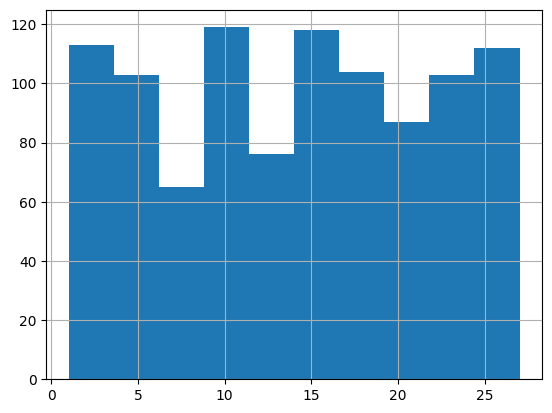

In [ ]:
orders_df.delivery_time.hist()

### **Eksplorasi Data orders_df dan customers_df**

**Menggabungkan data customers_df dan orders_df**

In [ ]:
#pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order
#informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order
#Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df
# Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
954,948,fulan 948,Prefer not to say,37,55 Anthony BoulevardApt. 474,8727,Corkeryshire,Tasmania,Australia,Non Active
633,632,fulan 632,Prefer not to say,55,704 Wright CourtApt. 223,3450,South Anthonyburgh,Northern Territory,Australia,Active
662,661,fulan 661,Male,45,4317 Holly CourtSuite 716,1431,North Beau,Western Australia,Australia,Active
33,34,fulan 34,Prefer not to say,55,09 Robinson SquareApt. 647,5387,Sauerfort,Western Australia,Australia,Active
939,934,fulan 934,Female,44,4434 Kreiger AvenueSuite 428,3395,Aaronbury,Northern Territory,Australia,Non Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,617
Non Active,384


Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar buruk bagi kita karena hampir 30% pelanggan kita belum pernah melakukan order sebelumnya.

In [ ]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,Non Active
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,Non Active
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,Non Active
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,Non Active
5,6,fulan 6,Prefer not to say,40,7118 Mccullough SquareSuite 639,9996,Blakehaven,New South Wales,Australia,Non Active
...,...,...,...,...,...,...,...,...,...,...
991,985,fulan 985,Male,72,997 Harrison KnollSuite 735,6621,Boscoville,Victoria,Australia,Non Active
996,990,fulan 990,Prefer not to say,38,4199 Glover CircleApt. 446,2430,Glovershire,South Australia,Australia,Non Active
998,992,fulan 992,Female,39,12 Daugherty ParadeApt. 846,2358,Lake Oliviatown,Queensland,Australia,Non Active
1003,997,fulan 997,Prefer not to say,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,Non Active


Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge. Berikut merupakan contoh kode untuk melakukan merge terhadap data orders_df dan customers_df.

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20,fulan 345,Prefer not to say,62,9182 Hermann MallApt. 890,799,Audreyfurt,Victoria,Australia,Active
996,997,346,53831,2021-01-18,2021-01-31,13,fulan 346,Prefer not to say,40,59 Bergstrom GroveSuite 260,6060,Olsonbury,Northern Territory,Australia,Active
997,998,407,53308,2021-05-05,2021-05-21,16,fulan 407,Male,41,5233 Lara AvenueSuite 291,8697,Hartmannshire,Queensland,Australia,Active
998,999,428,31643,2021-06-15,2021-07-12,27,fulan 428,Prefer not to say,66,80 Hermiston WaySuite 403,1112,North Liamfort,Australian Capital Territory,Australia,Active


Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas. Berikut merupakan beberapa hal yang bisa dijelajahi.

**Jumlah order berdasarkan kota**
Kita bisa membuat pivot table untuk memperoleh informasi terkait jumlah order berdasarkan kota dengan kode seperti berikut.


In [ ]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
city,
Jordanside,6
New Ava,6
Lake Rose,5
O'keefeton,5
East Max,5
Port Hannahburgh,5
Rubyfort,5
West Kai,5
Andrewborough,4


Nah, berdasarkan hasil tersebut, diketahui bahwa kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak.

**Jumlah order berdasarkan state**
Sekarang kita akan melihat jumlah order berdasarkan state. Untuk memperoleh informasi terkait hal ini, kita juga bisa menggunakan pivot table. Gunakan kode di bawah ini untuk menerapkannya.

In [ ]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

,order_id
state,
South Australia,148
Queensland,139
Western Australia,130
New South Wales,129
Australian Capital Territory,118
Victoria,118
Tasmania,112
Northern Territory,106


**Jumlah order berdasarkan gender** Informasi selanjutnya yang dapat kita eksplorasi adalah jumlah order berdasarkan gender. Untuk melakukan hal ini, tentunya kita perlu membuat sebuah pivot table menggunakan kode berikut.

In [ ]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

,order_id
gender,
Prefer not to say,725
Female,139
Male,136


Berdasarkan hasil tersebut, dapat dilihat bahwa kebanyakan order dilakukan oleh pelanggan yang berjenis kelamin prefer not to say. Hal ini tentunya sejalan dengan jumlah pelanggan yang kebanyakan dari kelompok gender tersebut.

**Jumlah order berdasarkan kelompok usia**
1.   mendefinisikan sebuah kolom baru bernama “age_group”
2.   tiga kelompok, yaitu youth, adults, dan seniors.



In [ ]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x : "Youth" if x <= 24 else ("seniors" if x > 64 else "Adults"))

In [ ]:
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

,order_id
age_group,
Adults,681
seniors,226
Youth,93


## **Explore product_df**

In [ ]:
products_df.sample(10)

,product_id,product_type,product_name,size,colour,price,quantity,description
1255,1249,Trousers,Tracksuit Bottoms,XL,blue,91,68,"A blue coloured, XL sized, Tracksuit Bottoms T..."
391,388,Shirt,Casual Slim Fit,L,red,113,78,"A red coloured, L sized, Casual Slim Fit Shirt"
578,573,Jacket,Bomber,L,yellow,90,54,"A yellow coloured, L sized, Bomber Jacket"
954,948,Trousers,Slim-Fit,L,red,119,80,"A red coloured, L sized, Slim-Fit Trousers"
283,281,Shirt,Cuban Collar,S,red,93,59,"A red coloured, S sized, Cuban Collar Shirt"
47,47,Shirt,Dress,M,yellow,119,61,"A yellow coloured, M sized, Dress Shirt"
793,787,Jacket,Pullover,M,green,114,47,"A green coloured, M sized, Pullover Jacket"
210,209,Shirt,Camp Collared,XL,violet,112,40,"A violet coloured, XL sized, Camp Collared Shirt"
955,949,Trousers,Slim-Fit,XL,red,119,67,"A red coloured, XL sized, Slim-Fit Trousers"
152,151,Shirt,Linen,S,yellow,116,60,"A yellow coloured, S sized, Linen Shirt"


In [ ]:
products_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar.

In [ ]:
products_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


In [ ]:
#Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan tipe dan nama produknya

products_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})


product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [ ]:
products_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

## **Explore sales_df**

In [ ]:
sales_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
2231,2231,450,517,102,1,102
2380,2380,482,724,119,2,238
4334,4334,866,757,109,2,218
2309,2309,468,242,106,2,212
1847,1847,372,275,95,1,95


In [ ]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


 kita juga memperoleh informasi bahwa pada setiap transaksi pelanggan paling banyak membeli tiga buah item dalam satu jenis produk dengan total harga sebesar 357 dolar

In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25
1,2,473,50490,2021-02-03,2021-02-13,10
2,3,774,46763,2021-10-08,2021-11-03,26
3,4,433,39782,2021-05-06,2021-05-19,13
4,5,441,14719,2021-03-23,2021-03-24,1


In [ ]:
sales_df.groupby(by="order_id").total_price.sum()

,total_price
order_id,
1,1487
2,1130
3,508
4,976
5,2043
...,...
995,1127
996,1459
997,204


## **Explore sales_df & product_df**

### **Menggabungkan data sales_df dan product_df**

In [ ]:
sales_products_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_products_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan terdapat perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, atau biaya lainnya

In [ ]:
sales_products_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})


,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Jika Anda perhatikan pivot table di atas, Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan.

In [ ]:
sales_products_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


Berdasarkan pivot table tersebut, diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.  

## **Explore all data**

### **Menghubungkan semua data**

In [ ]:
all_df = pd.merge(
    left=sales_products_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,seniors


In [ ]:
all_df.groupby(by=["city", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
city        product_type                         
Abbeyshire  Jacket                 7          683
            Shirt                  7          739
            Trousers              12         1209
Abbottburgh Jacket                 3          279
            Shirt                  9          937
...                              ...          ...
Zacharybury Trousers              17         1829
Zacshire    Jacket                 2          224
            Shirt                  2          184
Zacville    Jacket                 6          645
            Shirt                  4          394

[1602 rows x 2 columns]

In [ ]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [ ]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket (garis merah) paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales. Untuk tipe produk lain, Anda bisa melihatnya pada gambar pivot table di atas.

In [ ]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [ ]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})


quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432
seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471

In [ ]:
all_df.groupby(by="state").agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)


,order_id,total_price
state,,
South Australia,144,147816
Queensland,139,142062
New South Wales,129,131744
Australian Capital Territory,118,130442
Western Australia,130,125430
Tasmania,112,122095
Victoria,115,120357
Northern Territory,106,111854


Nah, pivot table di atas dapat memberikan kita gambaran terkait selera tipe produk pelanggan berdasarkan gender dan kelompok usia. Semua informasi ini akan sangat membantu Anda dalam menjawab pertanyaan terkait preferensi pengguna berdasarkan demografinya.

In [ ]:
all_df.to_csv("all_data.csv", index=False)

# **Visualization & Explanatory Analysis**

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
5. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?



### **Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**

In [ ]:
all_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
4603,4603,921,494,102,2,204,Jacket,Windbreaker,XL,red,...,fulan 418,Prefer not to say,57,855 Beahan IslandSuite 560,2775,North Sebastianberg,Australian Capital Territory,Australia,Active,Adults
1783,1783,361,992,106,2,212,Trousers,Wool,M,yellow,...,fulan 988,Prefer not to say,35,1130 Turner Estate DrSuite 925,9386,New Harry,Western Australia,Australia,Active,Adults
1586,1586,323,357,94,3,282,Shirt,Henley,M,orange,...,fulan 852,Prefer not to say,67,079 Chase MallApt. 902,8460,O'connertown,Tasmania,Australia,Active,seniors
4209,4209,839,111,92,1,92,Shirt,Denim,S,orange,...,fulan 306,Prefer not to say,68,344 Addison PlazaApt. 998,8581,West Audreyhaven,Queensland,Australia,Active,seniors
482,482,107,388,119,1,119,Shirt,Casual Slim Fit,L,red,...,fulan 127,Prefer not to say,30,769 Gibson TrailApt. 359,3708,South Adam,Western Australia,Australia,Active,Adults


In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25
1,2,473,50490,2021-02-03,2021-02-13,10
2,3,774,46763,2021-10-08,2021-11-03,26
3,4,433,39782,2021-05-06,2021-05-19,13
4,5,441,14719,2021-03-23,2021-03-24,1


Untuk menjawab pertanyaan pertama, kita perlu membuat sebuah DataFrame baru untuk menampung informasi terkait jumlah order dan total revenue yang diperoleh pada tiap bulannya. Oleh karena itu, kita perlu mengubah frekuensi dari data yang awalnya harian menjadi bulanan.

Seperti biasa, library tercinta kita yaitu pandas telah menyediakan sebuah method bernama resample(). Method ini memungkinkan kita untuk mengubah frekuensi atau melakukan resampling terhadap DataFrame yang memiliki komponen time series. Untuk menggunakan method ini, kita harus mendefinisikan parameter rule (mengatur target konversi) dan on (nama kolom bertipe datetime yang akan diubah frekuensinya)

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head(15)

<ipython-input-370-fff4f5df982f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597
5,June,102,101458
6,July,105,116081
7,August,106,104565
8,September,98,96526
9,October,80,84266


Di bawah ini contoh kode yang dapat Anda gunakan untuk membuat line chart terkait jumlah order per bulan.

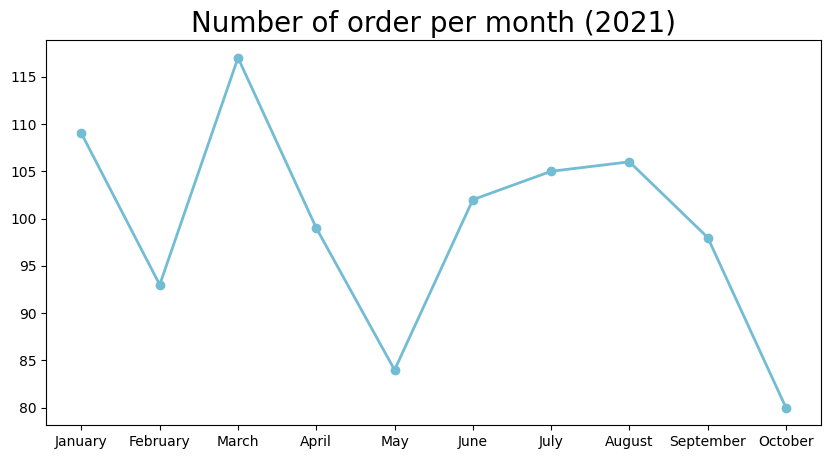

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of order per month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober.

Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan. Untuk memvalidasi hal ini, buatlah line chart menggunakan contoh kode berikut.

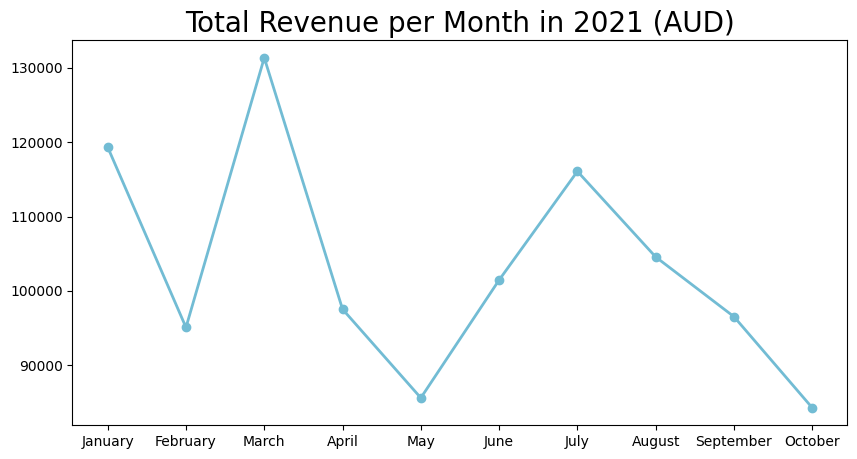

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2021 (AUD)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### **Produk apa yang paling banyak dan paling sedikit terjual?**

In [ ]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


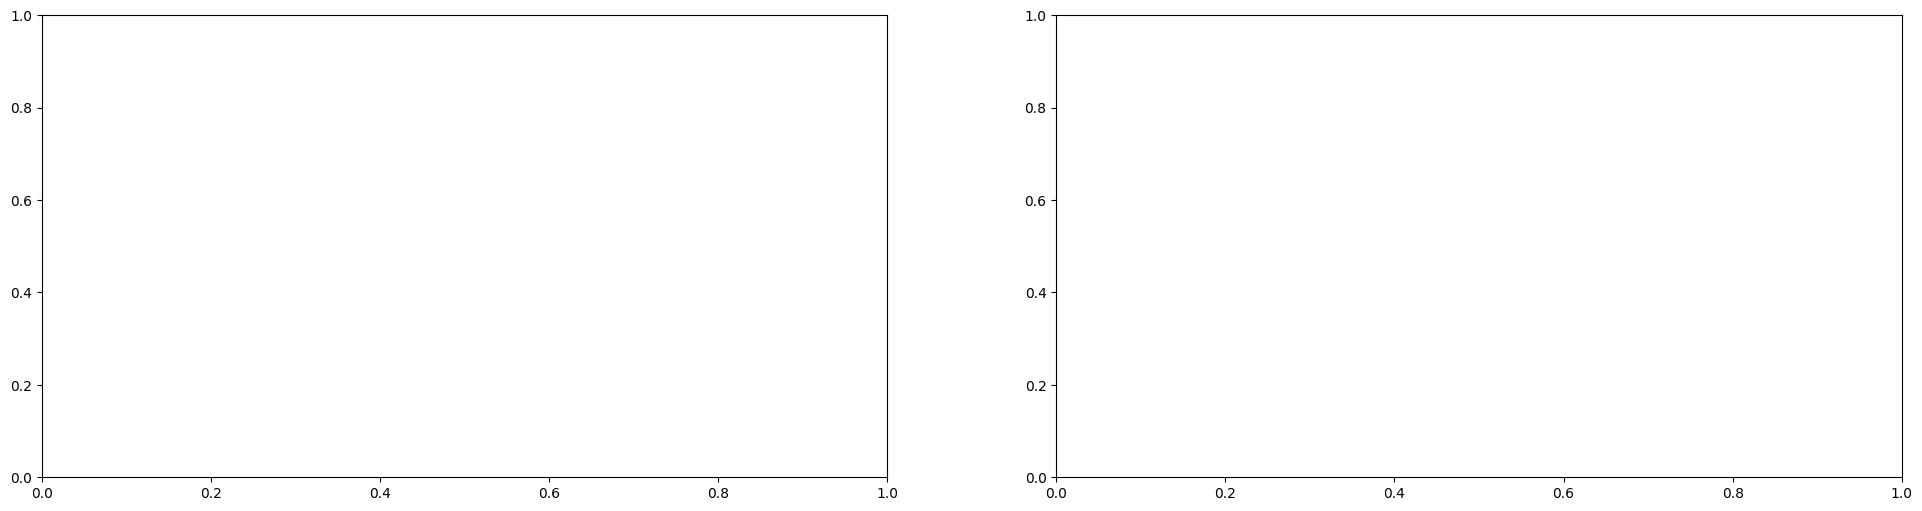

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

<ipython-input-375-9387526f38c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-375-9387526f38c8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


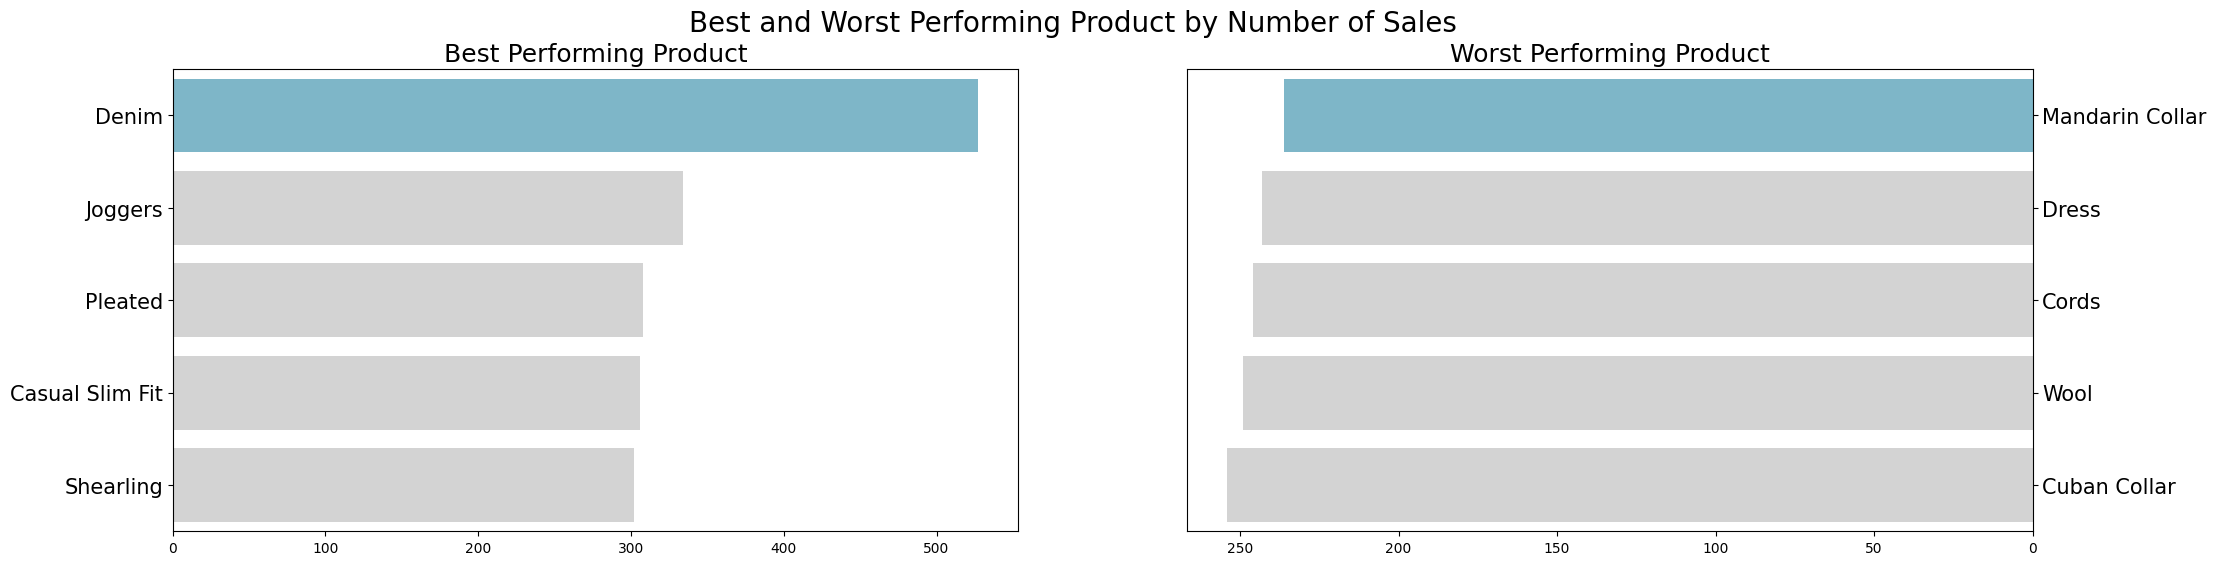

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### **Bagaimana Demografi Pelanggan yang Kita Miliki?**

**Berdasarkan gender**

In [ ]:
bygeder_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygeder_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bygeder_df

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


<ipython-input-377-da57dd060270>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-377-da57dd060270>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


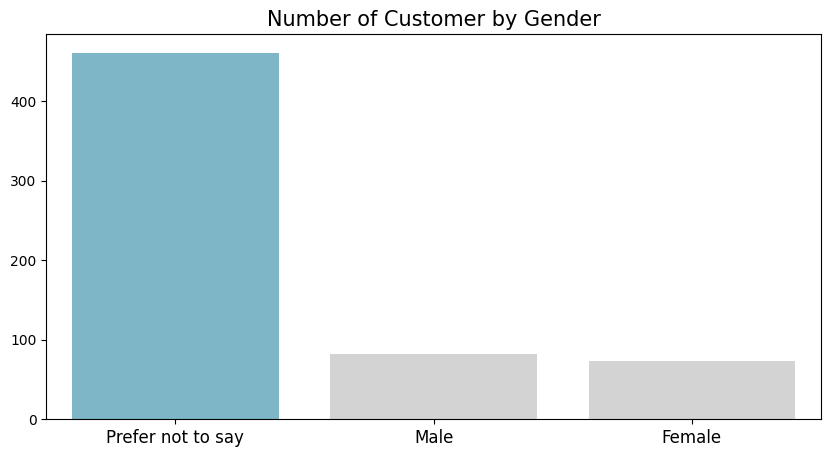

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygeder_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Berdasarkan kelompok usia**

In [ ]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df

,age_group,customer_count
0,Adults,416
1,Youth,55
2,seniors,145


In [ ]:
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])

<ipython-input-380-e3505f4dfb48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-380-e3505f4dfb48>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


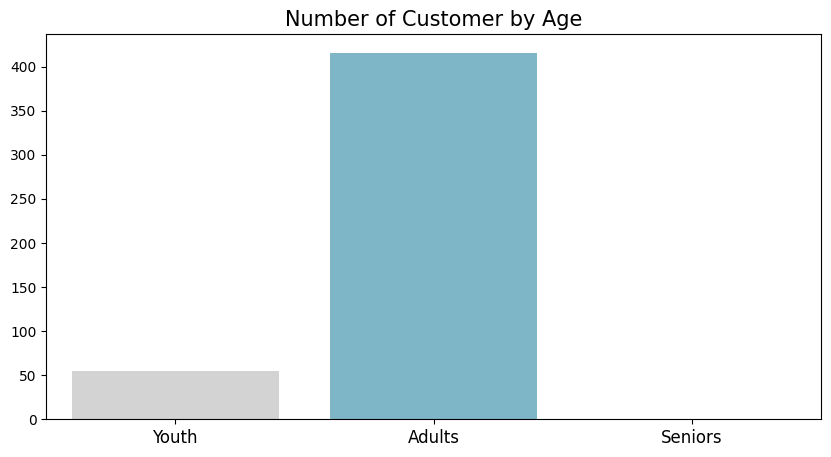

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Berdasarkan Negara Bagian**

In [ ]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


<ipython-input-382-4cc7a7e709bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


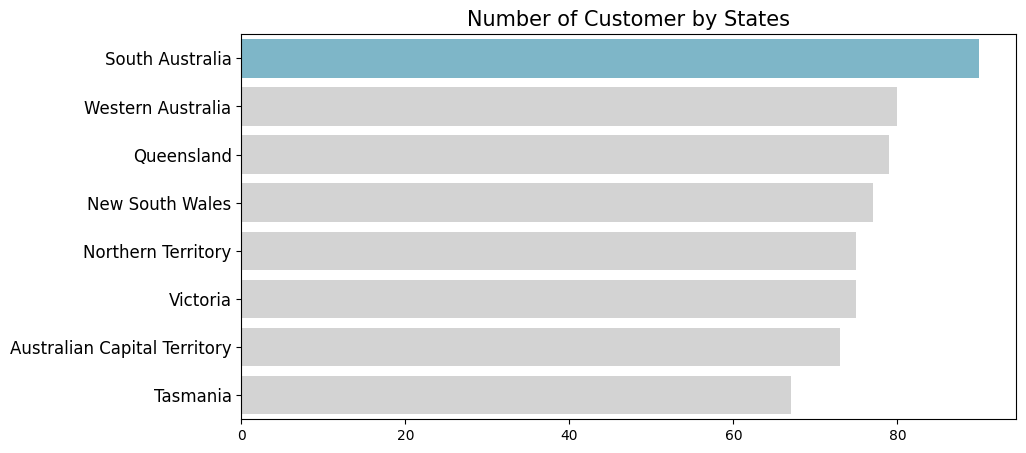

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## **RFM Analysis**

Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

1. Recency: parameter yang digunakan untuk melihat kapan terakhir seorang - - - pelanggan melakukan transaksi.
2. Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
3. onetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", #mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017
2,10,2021-03-09,1,270
3,11,2021-05-28,1,382
4,12,2021-06-19,1,1551


In [ ]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,1,2021-04-04,3,1641,203
1,7,2021-05-21,1,1017,156
2,10,2021-03-09,1,270,229
3,11,2021-05-28,1,382,149
4,12,2021-06-19,1,1551,127


In [ ]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


In [ ]:
rfm_df.describe()

,customer_id,frequency,monetary,recency
count,616.00000,616.000000,616.000000,616.000000
mean,501.75974,1.612013,1675.000000,122.469156
std,286.16075,0.853754,1069.724092,84.326017
min,1.00000,1.000000,100.000000,0.000000
25%,259.50000,1.000000,878.250000,50.750000
50%,496.50000,1.000000,1439.000000,110.500000
75%,751.00000,2.000000,2165.000000,191.000000
max,1000.00000,6.000000,7632.000000,296.000000


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
241,401,4,3093,0
425,687,1,1122,0
426,690,3,3693,0
98,163,3,3494,1
250,415,2,2269,1


In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
350,571,6,6640,66
212,348,5,5119,24
346,566,5,5435,5
409,664,5,6341,20
166,282,5,7632,63


<ipython-input-389-c2839dc9206c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-389-c2839dc9206c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-389-c2839dc9206c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

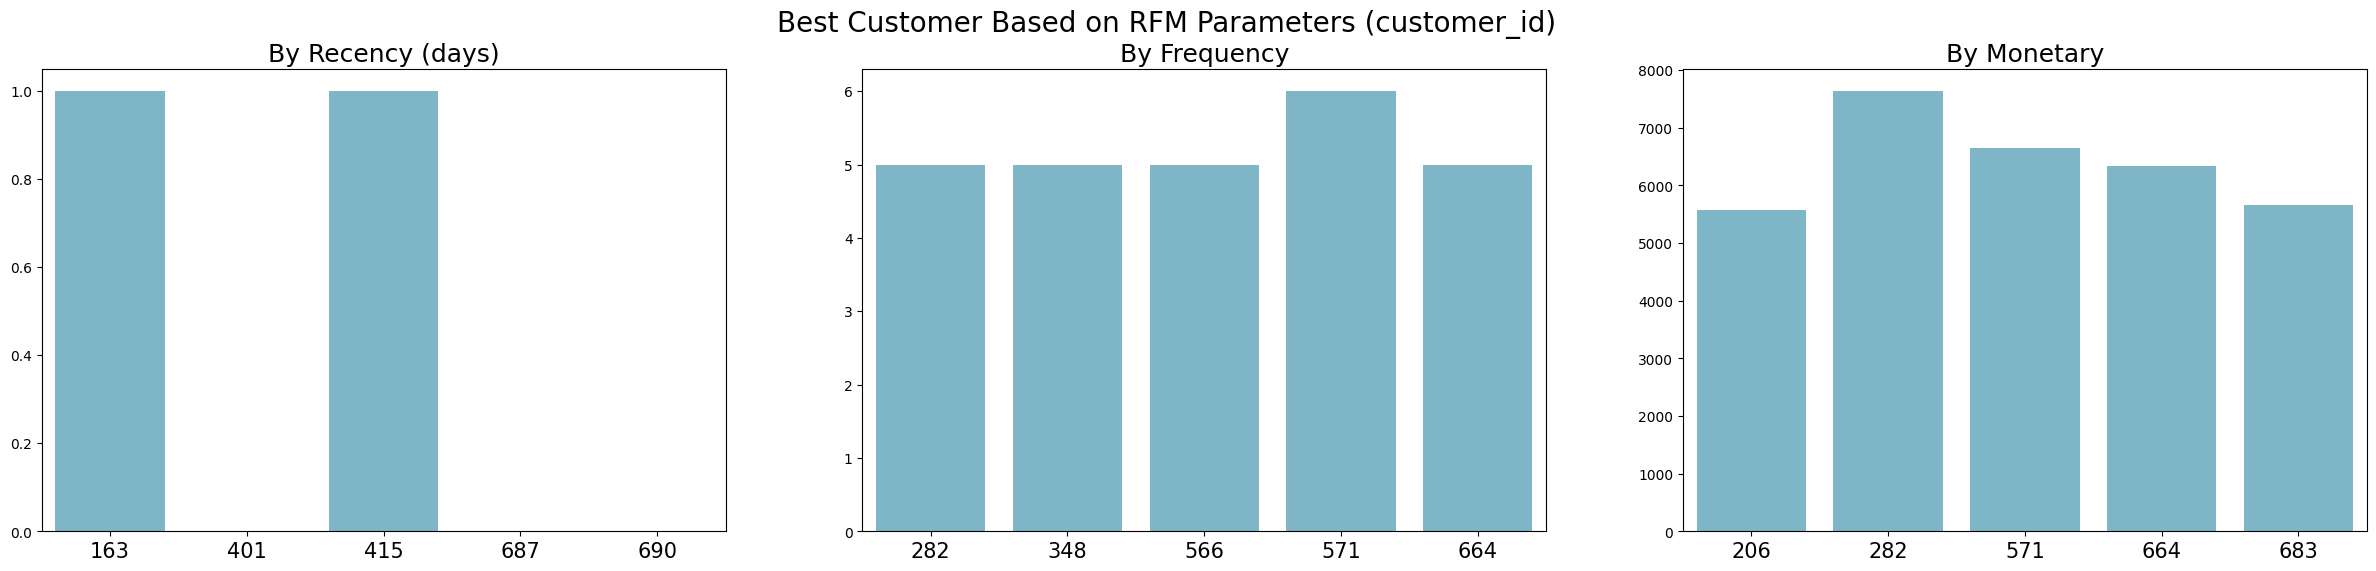

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


**Mengurutkan customer berdasarkan recency, frequency, & monetary score**

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,3,1641,203,133.0,560.0,351.0
1,7,1,1017,156,215.5,179.5,195.5
2,10,1,270,229,83.0,179.5,11.0
3,11,1,382,149,233.0,179.5,21.0
4,12,1,1551,127,267.5,179.5,330.0


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,3,1641,203,21.626016,90.909091,56.980519
1,7,1,1017,156,35.040650,29.139610,31.737013
2,10,1,270,229,13.495935,29.139610,1.785714
3,11,1,382,149,37.886179,29.139610,3.409091
4,12,1,1551,127,43.495935,29.139610,53.571429


In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,1,3.06
1,7,1.58
2,10,0.56
3,11,0.79
4,12,2.26
5,13,1.14
6,15,3.84


**Segmentasi customer berdasarkan RFM_score**

In [ ]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,1,3.06,Medium value customer
1,7,1.58,lost customers
2,10,0.56,lost customers
3,11,0.79,lost customers
4,12,2.26,Low value customers
5,13,1.14,lost customers
6,15,3.84,Medium value customer
7,16,2.33,Low value customers
8,18,3.30,Medium value customer
9,19,1.68,Low value customers


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,50
1,Low value customers,204
2,Medium value customer,137
3,Top customers,35
4,lost customers,190


In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

<ipython-input-396-13472b00304f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


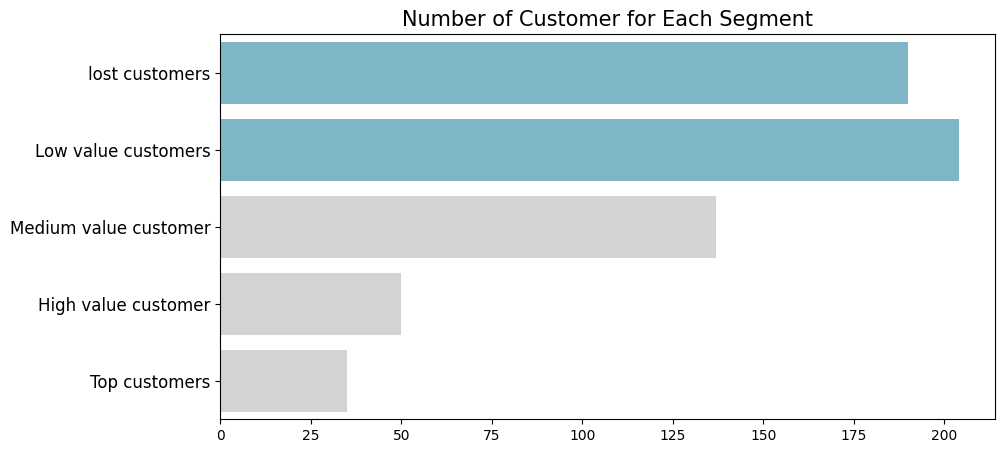

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()
